In [11]:
# import pandas
import pandas as pd 
import matplotlib.pyplot as plt

# read file 
avocado_data = pd.read_csv("./data/raw/avocado-updated-2020.csv")

# Get all unique geos to cleanly split the data
uniqueGeo = avocado_data['geography'].unique()

cities = ['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
 'Buffalo/Rochester', 'Charlotte', 'Chicago',
 'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit',
 'Grand Rapids', 'Harrisburg/Scranton', 'Hartford/Springfield',
 'Houston', 'Indianapolis', 'Jacksonville', 'Las Vegas', 'Los Angeles',
 'Louisville', 'Miami/Ft. Lauderdale', 'Nashville',
 'New Orleans/Mobile', 'New York',
 'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh',
 'Portland', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
 'San Diego', 'San Francisco', 'Seattle', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa']

city_data = avocado_data.query('geography in @cities').assign(total_value = lambda a: a.average_price * a.total_volume)

average_data = city_data.groupby(['geography'], as_index = False)[['total_volume', 'total_value']].agg('sum').assign(average_price = lambda a: a.total_value/a.total_volume).sort_values('average_price')



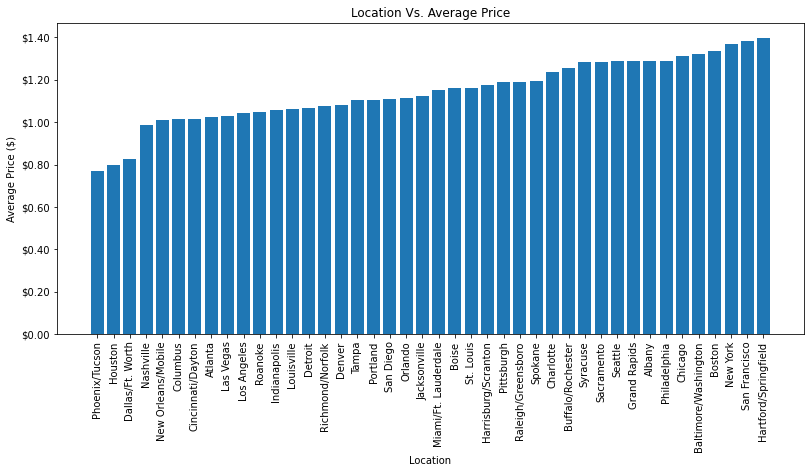

In [47]:
def bar_chart(df, xdim, ydim, ylab, title, fileName):
    x = df[xdim]
    y = df[ydim]

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x, y)
 
    #adds a title and axes labels
    ax.set_title(title)
    ax.set_xlabel('Location')
    ax.set_ylabel(ylab)
    plt.xticks(rotation = 'vertical')
    plt.tight_layout(pad=4)
    plt.subplots_adjust(bottom=0.15)
    ax.yaxis.set_major_formatter('${x:1.2f}')
    #scale the axises
    plt.autoscale()
    #save the figure
    plt.savefig(fileName,
                 bbox_inches="tight")
    plt.show()

bar_chart(average_data, 'geography', 'average_price', 'Average Price ($)', 'Location Vs. Average Price', 'plots/Location and Price.png')



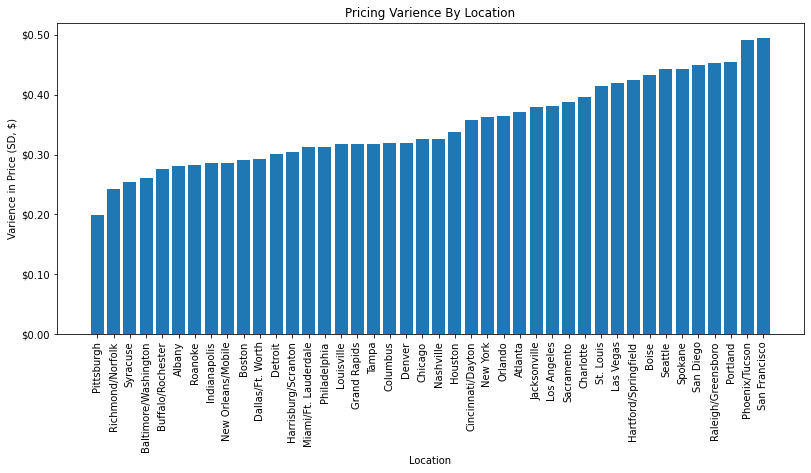

In [49]:
varience = city_data.groupby(['geography'], as_index=False)['average_price'].std().sort_values('average_price')

bar_chart(varience, 'geography', 'average_price', "Varience in Price (SD, $)", "Pricing Varience By Location", "plots/Location and Varience.png")
